In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
ruta = "..\ds_blend_students_2020\DESAFIO\properati.csv"

data = pd.read_csv(ruta, sep=",")

In [3]:
# nulos de superficie
data[["surface_total_in_m2","surface_covered_in_m2"]].isnull().sum()/data.shape[0]*100

surface_total_in_m2      32.443491
surface_covered_in_m2    16.422208
dtype: float64

In [5]:
pd.set_option("display.max_colwidth", None)
pd.options.display.max_columns = None
pd.options.display.max_rows = 20

In [11]:
# columnas nuevas
data["surface_total_in_m2_limpio"] = data["surface_total_in_m2"]
data["surface_covered_in_m2_limpio"] = data.surface_covered_in_m2
data["diferencia_mt2"] = data["surface_total_in_m2"] - data["surface_covered_in_m2"]
mask3 = data.diferencia_mt2 < -1
dif_neg = data.loc[mask3,"diferencia_mt2"]
print(dif_neg.count())

1085


In [7]:
# descripcion
data[["surface_total_in_m2","surface_covered_in_m2", "surface_covered_in_m2_limpio"]].describe().round(2)

,surface_total_in_m2,surface_covered_in_m2,surface_covered_in_m2_limpio
count,81892.00,101313.00,101313.00
mean,233.80,133.05,133.05
std,1782.22,724.35,724.35
min,0.00,0.00,0.00
25%,50.00,45.00,45.00
50%,84.00,75.00,75.00
75%,200.00,150.00,150.00
max,200000.00,187000.00,187000.00


In [15]:
# registros corregidos
data.loc[35151,"surface_covered_in_m2_limpio"] = 49
data.loc[39221,"surface_covered_in_m2_limpio"] = 382.40
data.loc[76012,"surface_covered_in_m2_limpio"] = 187
data.loc[26916,"surface_total_in_m2_limpio"] = 174
data.loc[22146,"surface_covered_in_m2_limpio"] = 110
data.loc[22146,"surface_total_in_m2_limpio"] = 800
data.loc[107691,"surface_total_in_m2_limpio"] = 895
data.loc[107798,"surface_total_in_m2_limpio"] = 1078
data.loc[107798,"surface_covered_in_m2_limpio"] = 260
data.loc[15276,"surface_covered_in_m2_limpio"] = 245
data.loc[15276,"surface_total_in_m2_limpio"] = 760
data.loc[120302,"surface_total_in_m2_limpio"] = 3500
data.loc[24779,"surface_covered_in_m2_limpio"] = 300
data.loc[24779,"surface_total_in_m2_limpio"] = 1116
data.loc[12745,"surface_covered_in_m2_limpio"] = 120
data.loc[12745,"surface_total_in_m2_limpio"] = 3000


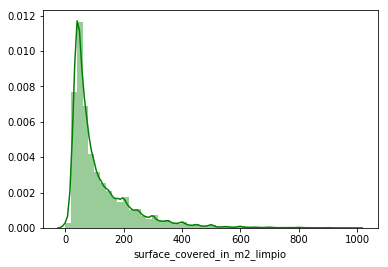

In [8]:
# sns.distplot(data.surface_covered_in_m2, kde=True, color = "blue")
# sns.distplot(data.surface_total_in_m2, kde=True, color = "red")
mask1 = data.surface_covered_in_m2_limpio < 1000
menor_mil = data.loc[mask1,:]
sns.distplot(menor_mil.surface_covered_in_m2_limpio, kde=True, color = "green")

In [16]:
# outliers
q1 = data["surface_covered_in_m2_limpio"].quantile(0.25)
print(q1)
q2 = data["surface_covered_in_m2_limpio"].quantile(0.5)
print(q2)
q3 = data["surface_covered_in_m2_limpio"].quantile(0.75)
print(q3)


iqr = (q3 - q1) * 1.5

up_threshold = q3 + iqr
low_threshold = q1 - iqr

print(up_threshold)
print(low_threshold)


outlier_sup = data["surface_covered_in_m2_limpio"] > up_threshold
outlier_inf = data["surface_covered_in_m2_limpio"] < low_threshold
outlier_mask = np.logical_or(outlier_sup, outlier_inf)
# not_outliers = np.logical_not(outlier_mask)

outliers = data["surface_covered_in_m2_limpio"][outlier_mask]
outliers.count()

45.0
75.0
150.0
307.5
-112.5


6681

In [24]:
# máscara sin outliers
mask_sin_outliers = data.surface_covered_in_m2_limpio < 307.5
data_m2 = data.loc[mask_sin_outliers,:]
z = data_m2.groupby(["state_name", "place_name"])["surface_covered_in_m2_limpio"].count().sort_values(ascending=False)
valores = pd.DataFrame(z)
valores
print(data_m2.shape)
data_m2.property_type.value_counts()

(94632, 29)


apartment    59314
house        28051
PH            4878
store         2389
Name: property_type, dtype: int64

In [39]:
menor_25 = data_m2.surface_covered_in_m2_limpio < 25
mask1 = data_m2.loc[menor_25,"surface_covered_in_m2_limpio"]
print(mask1.count())
mask2 = data_m2.loc[menor_25,["surface_covered_in_m2_limpio", "description"]]
mask2

2554


,surface_covered_in_m2_limpio,description
173,20.0,"Corredor Responsable: Daniel Aibe - CMCPD 1155Contacto: Gustavo Arballos - MLS ID # 420351012-120EXCELENTE CHALET DE ESTILO RACIONALISTA DISEÑADO POR EL ESTUDIO SALAYA BLIZNIUK, EN LA ZONA DE ALAMOS I, EDIFICADO SOBRE DOS LOTES QUE SUMAN UN TOTAL DE 1800 MTS. SON 600 METROS DE PRIMERISIMA CALIDAD DE CONSTRUCCION EN DOS PLANTAS. Planta Baja: Amplio hall-living - comedor - playroom; Cocina; Toilette de cortesía; Dependencia de Servicio con baño; Lavadero; Garaje doble; Zona de parrilla exterior no cubierta; Zona de Bowling con dos pistas de bolos de medidas y estándares profesionales. Planta Alta: Living salón de TV; Tres dormitorios en suite con baño completo y placares compartimentados y equipados; Master suite con vestidor y baño completo con hidromasaje. CARACTERÍSTICAS EDILICAS: Doble pared con revestimiento de ""tarquini"" y piedra; Aberturas exteriores de aluminio ""Schüko"" con doble vidrio laminado interior y exteriormente oscilo batientes; Aire Acondicionado en Living y Master Suite y pre instalación en todos los ambientes; Calefacción por losa radiante a caldera a gas; dos termo tanque para agua sanitaria; Sanitarios de diseño; Riego por aspersión automatizado y computerizado; Iluminación interior a control remoto; Sistema de home theater en TV Living y Proyector mural en el ambiente 2 del living; Sistema de audio independiente y centralizado en 4 ambientes; Seguridad: Cortinas/persianas metálicas automatizadas en grandes aberturas, alarma; pre instalación de cámaras IP."
277,20.0,"Corredor Responsable: MARA D. MASSIONI - CUCICBA 3472Contacto: Damián Grimberg - MLS ID # 420801017-8REAL OPORTUNIDAD, Atencion inversores! VENTA de excelente local de importantes dimensiones: 305M2, distribuido en 2 plantas: planta baja: 170m2 (todo ventanal) con sotano de 135 m2. En esquina, posee salida a dos calles: Santiago del Estero e H. Yrigoyen. Posibilidad de subdividir en 6 locales o aprovechar los metros para un solo local con sotano (Ideal supermercado, farmacia, muebleria, etc.) Expensas $6000. Zona 100% comercial! Expensas $6400"
281,23.0,"DEPARTAMENTO DE 1 AMB FRENTE A LAS PLAYAS DEL ALFAR ,..... VER LINK .......copiar y pegar.........http:// ............ ., LA CASETA, LA RESERVA, PLAYAS EXCLUSIVAS... EXTERNO, CON BAÑO COMPLETO,AMBIENTE CHICO DE 23 M2...SE ESCUCHAN PROPUESTAS..."
302,20.0,"Corredor Responsable: Marcelo Trujillo - CUCICBA 6470 / CMCPDJLM 810Contacto: Arq. María Victoria Marchesini - MLS ID # 420261066-40Casa en Pompeya sobre Av. La Plata al 2600 Venta en Block Venta Excelente oportunidad Sobre Lote de 8,56x29,20mts Zonificación C3 II Zona de influencia del Distrito Tecnológico Superficie a Construir 1747m2, 8 plantas, sin FOT Se vende en Block la siguente construcción: Gran local a la calle de 60m2 , al fondo galpón/depósito de 85m2. Con entrada independiente cuenta con un garage, luego se accede a un living desde el cual conecta en forma independiente, por un lado a un loft de 50m2 y por otro lado en planta alta se accede a un departamento de 100m2 cubiertos, con 3 dormitorios, gran living comedor, patio y terraza de 60m2. Recomendamos este lote, excelente inversión. Llamenos para una visita. Vea en este aviso, fotos y plano de distribución."
349,1.0,Departamento en Venta de 1 dorm. en Cordoba
...,...,...
120113,24.0,"Departamento de un ambiente ubicado al contrafrente con vista abierta, muy luminoso, cocina separada con ventilación natural, baño completo, en muy buen estado original, ideal vivienda permanente o para renta, a pasos del mar, del centro comercial Güemes y del nuevo paseo de compras Aldrey de la antigüa terninal."
120591,20.0,"Se trata de un local comercial ubicado en galeria Lucerna, sobre Av. Rafael Nuñez al 4600, actualmente la mayoría de los locales se utilizan como oficinas, hay varios estudios de arquitectura, contadores y abogados.Tiene alrededor de 20m2 con baño compartido en la galería."
121121,24.0,Monoambiente con renta hasta febrer